<a href="https://colab.research.google.com/github/etrdares/predictive_individual/blob/main/Predictive_Individual_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and import libraries

In [1]:
# Install dependencies
!pip install pytorch-tabnet scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [9]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [3]:
# Clone the GitHub repository
!git clone https://github.com/etrdares/predictive_individual_assignment.git predictive_individual_assignment

Cloning into 'predictive_individual_assignment'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 503.03 KiB | 6.45 MiB/s, done.


In [4]:
# Import the file
df = pd.read_csv("/content/predictive_individual_assignment/bank-full.csv", delimiter = ";")
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Preprocess the dataset

## Check missing values

In [5]:
# Count missing values
count_na = df.isna().sum()
count_na

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Convert target variable to numerical binary

In [6]:
# Convert target variable to binary
df['y'] = df['y'].map({'no': 0, 'yes': 1})

## Convert categorical variables to numerical features

In [7]:
# Identify categorical and numerical features
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Label encoding for categorical features
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

## Split the dataset

In [8]:
# Split dataset
X = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (27126, 16), Validation set: (9042, 16), Test set: (9043, 16)


# Exploratory data analysis

## Statistical summary of the dataset

In [ ]:
df.describe(include = [np.number])

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Number of bank customers based on subscription status



y
0    39922
1     5289
Name: count, dtype: int64


<ipython-input-10-78eedfd1534e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=y_counts.index, y=y_counts.values, palette="Set2")


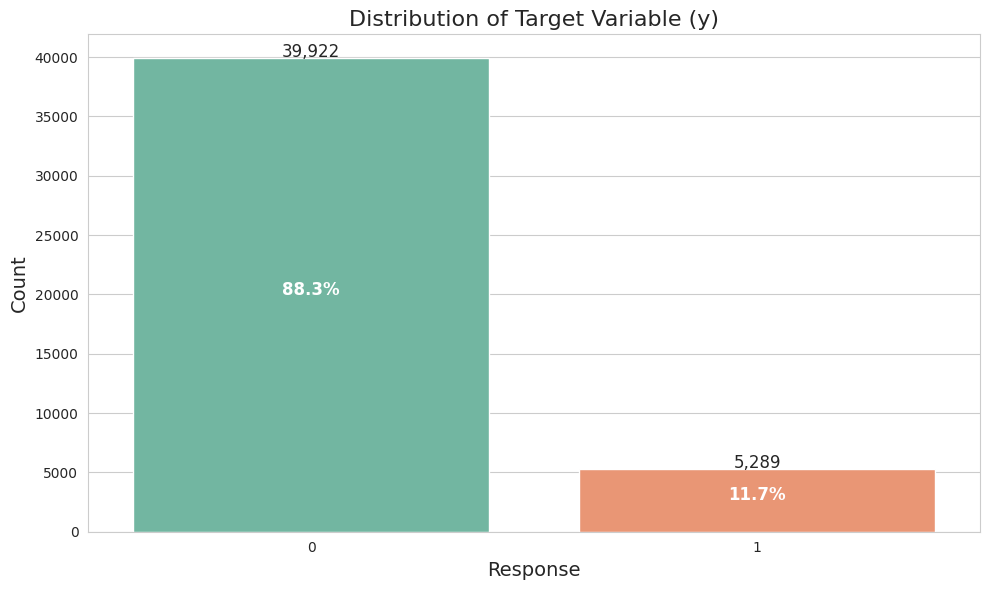

In [10]:
# Count the values in the 'y' column
y_counts = df['y'].value_counts()

# Print the counts
print(y_counts)

# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create a bar chart
ax = sns.barplot(x=y_counts.index, y=y_counts.values, palette="Set2")

# Add title and labels
plt.title('Distribution of Target Variable (y)', fontsize=16)
plt.xlabel('Response', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for i, count in enumerate(y_counts.values):
    ax.text(i, count + 100, f'{count:,}', ha='center', fontsize=12)

# Add percentage labels
total = y_counts.sum()
for i, count in enumerate(y_counts.values):
    percentage = (count / total) * 100
    ax.text(i, count/2, f'{percentage:.1f}%', ha='center', color='white', fontsize=12, fontweight='bold')

# Improve the appearance
plt.tight_layout()

# Display the plot
plt.show()

## Term deposit subscription by outcome of previous campaign

<Figure size 1000x600 with 0 Axes>

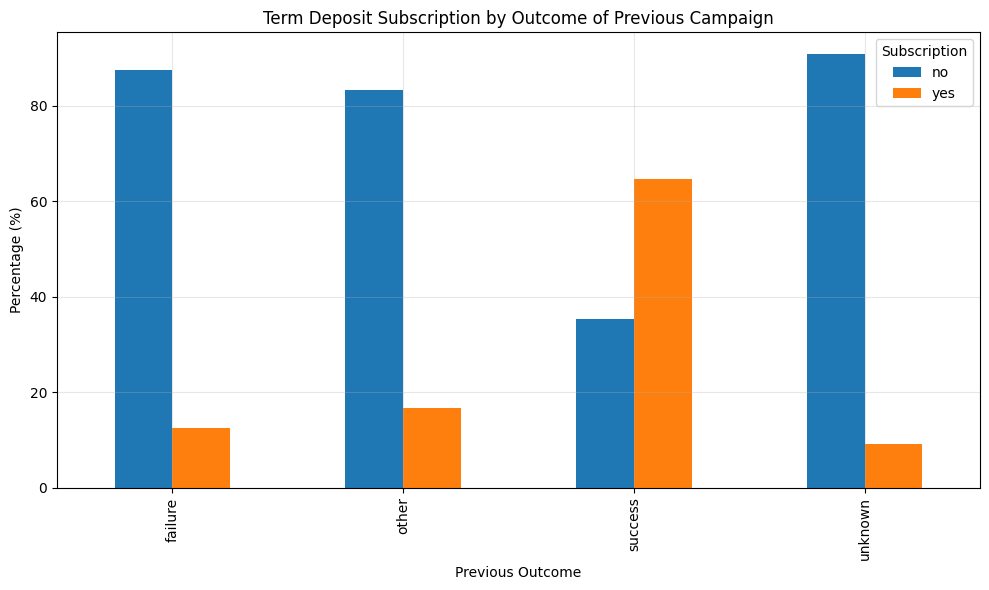

In [ ]:
plt.figure(figsize=(10, 6))
poutcome_subscription = pd.crosstab(df['poutcome'], df['y'])
poutcome_subscription_pct = poutcome_subscription.div(poutcome_subscription.sum(axis=1), axis=0) * 100

# Plot the percentage
poutcome_subscription_pct.plot(kind='bar', figsize=(10, 6))
plt.title('Term Deposit Subscription by Outcome of Previous Campaign')
plt.xlabel('Previous Outcome')
plt.ylabel('Percentage (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

## Understanding data type and value for non-numerical data
This task is needed to understand what should be done in transforming the categorical variables before the dataset is fed into the model.

In [ ]:
# Show the data type for each feature in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Display the distribution of instances based on job of bank customers
df["job"].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [ ]:
# Show the distribution of instances based on marital status of bank customers
df["marital"].value_counts()

,count
marital,
married,27214
single,12790
divorced,5207


In [ ]:
# Display the distribution of instances based on latest education level of bank customers
df["education"].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


In [ ]:
# Show the distribution of instances based on credit default status of bank customers
df["default"].value_counts()

,count
default,
no,44396
yes,815


In [ ]:
# Show the distribution of instances based on housing loan status of bank customers
df["housing"].value_counts()

,count
housing,
yes,25130
no,20081


In [ ]:
# Display the distribution of instances based on personal loan status of bank customers
df["loan"].value_counts()

,count
loan,
no,37967
yes,7244


In [ ]:
# Show the distribution of instances based on preferred phone number of bank customers
df["contact"].value_counts()

,count
contact,
cellular,29285
unknown,13020
telephone,2906


In [ ]:
# Display the distribution of instances based on the outcome of previous marketing campaign
df["poutcome"].value_counts()

,count
poutcome,
unknown,36959
failure,4901
other,1840
success,1511


In [ ]:
# Display the distribution of instances based on the status of term deposit subscription after the current marketing campaign
df["y"].value_counts()

,count
y,
no,39922
yes,5289


## Age distribution of bank customers

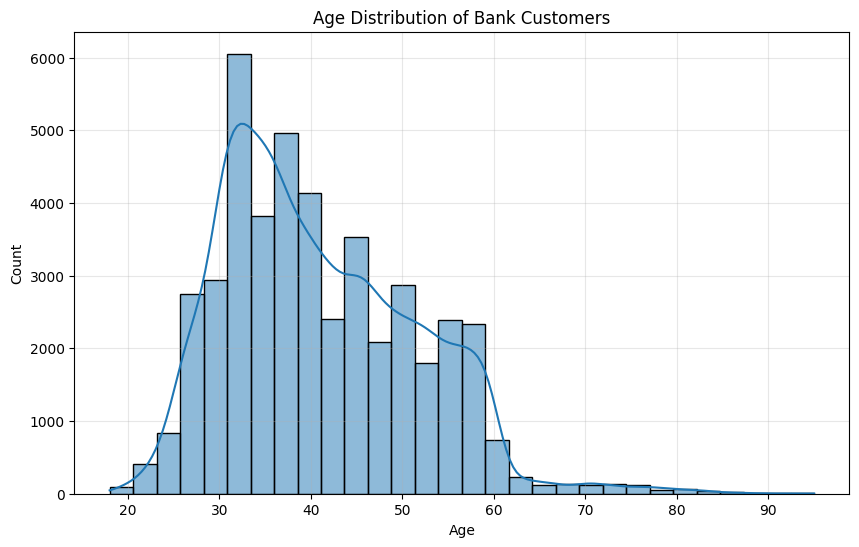

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

## Term deposit subscription based on job

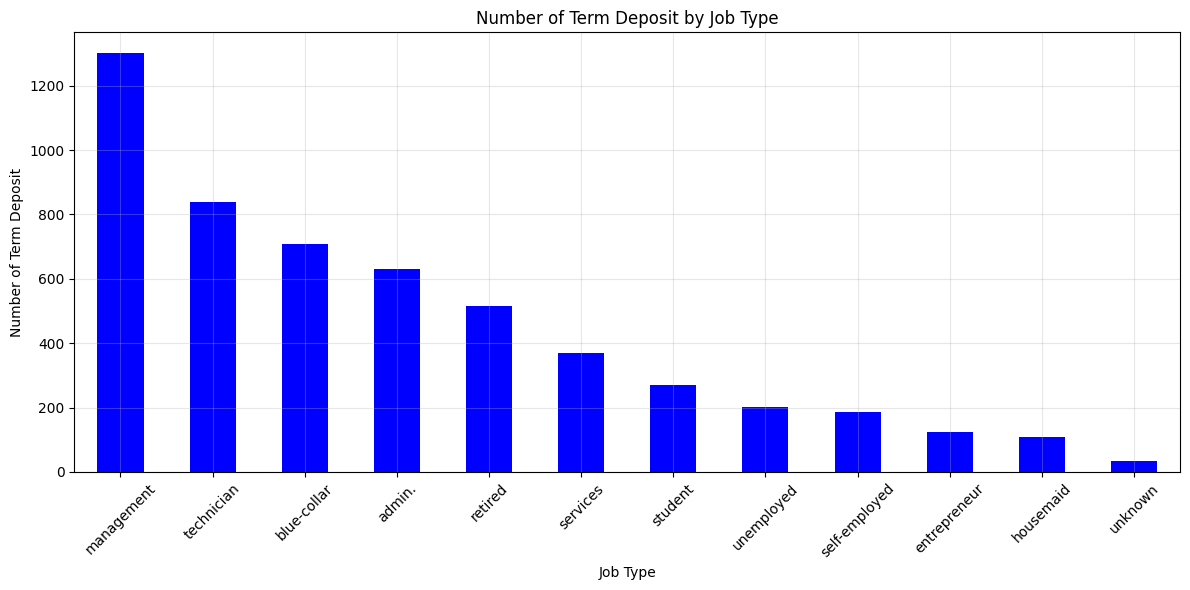

In [ ]:
yes_by_job = df[df['y'] == 'yes']['job'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
yes_by_job.plot(kind='bar', color='blue', figsize=(12, 6))
plt.title('Number of Term Deposit by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Number of Term Deposit')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Term deposit subscription based on education

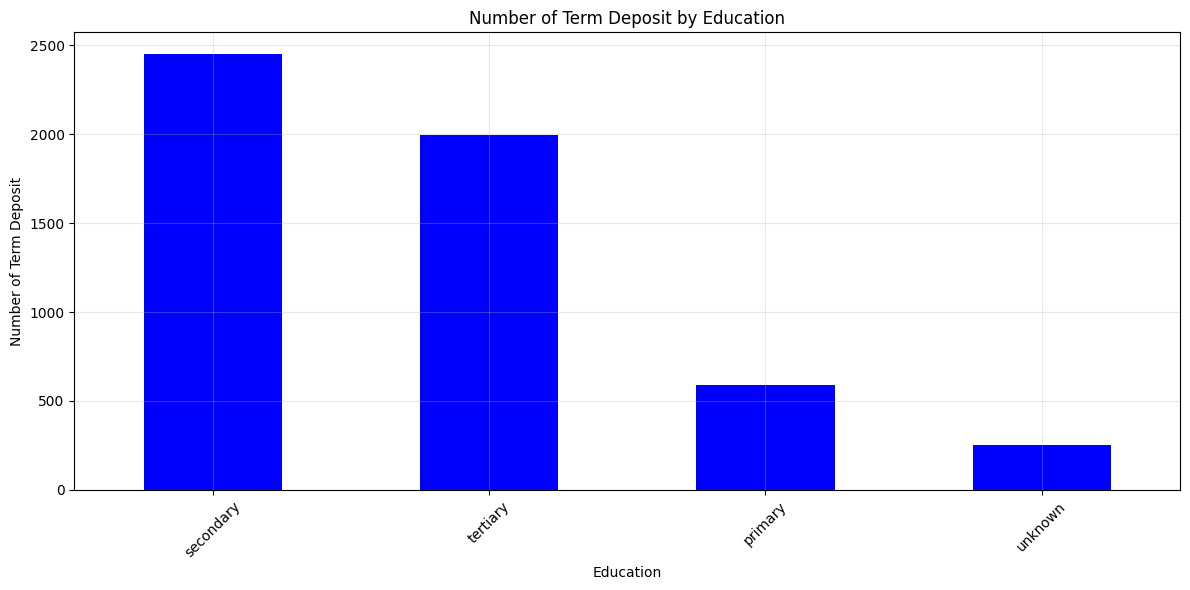

In [ ]:
yes_by_job = df[df['y'] == 'yes']['education'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
yes_by_job.plot(kind='bar', color='blue', figsize=(12, 6))
plt.title('Number of Term Deposit by Education')
plt.xlabel('Education')
plt.ylabel('Number of Term Deposit')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()